In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
path = os.getcwd() + '\dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

# Linear regression with one variable
## Exercise 1
Examining input data

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Exercise 2
Plotting and analyzing data

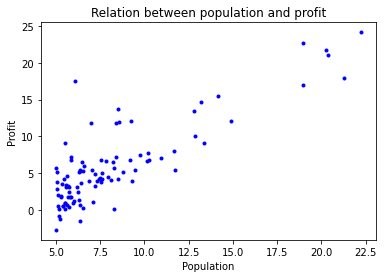

In [5]:
plt.plot(data['Population'], data['Profit'], '.b')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Relation between population and profit')
plt.show()

## Exercise 3
Inserting new coulmn to Dataframe

In [6]:
data.insert(loc=0, column='Cost', value=1, allow_duplicates=False)

## Exercise 4
Checking if column has been added correctly and variables separation

In [7]:
data.head()

,Cost,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
X = data[['Cost', 'Population']]
X.head()

,Cost,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y = data.Profit
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

In [10]:
# Data conversion
X = np.matrix(X.values, dtype=np.float64)
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0]), dtype=np.float64)
# transpose if necessary
if len(X) != 1:
    X = np.transpose(X)
if len(y) != 1:
    y = np.transpose(y)

In [11]:
X.shape

(2, 97)

In [12]:
y.shape

(1, 97)

## Exercise 5

## Exercise 6
Cost function definition, adjusted for many columns in X

In [13]:
def computeCost(X, y, theta):
    m = X.shape[1]
    cost = (1/(2*m))*np.sum(np.power(np.dot(theta, X) - y, 2))
    return cost

In [14]:
computeCost(X, y, theta)

32.072733877455676

## Exercises 7 & 8
Gradient descent method definition

In [15]:
def gradient_prosty(X, y, theta, alpha, it):
    m = X.shape[1]
    costHist = []
    thetaTemp = theta
    for i in range(it):
        for j in range(theta.shape[1]):
            thetaTemp[0,j] = thetaTemp[0,j] - alpha * (1/m) * np.sum((np.dot(theta, X) - y) *  np.transpose(X[j]))
        theta = thetaTemp
        costHist.append(computeCost(X,y, np.matrix(np.array(theta))))
    return costHist, theta

## Exercise 9
Calculating optimal parameters for dataset

In [16]:
#initial values for learning rate and no. of iterations
alpha = 0.01
it = 1000

cost = gradient_prosty(X, y, theta, alpha, it)[0]
theta_result = gradient_prosty(X, y, theta, alpha, it)[1]

## Exercise 9
Printing optimal parametres for dataset

In [17]:
theta_result

matrix([[-3.79118595,  1.18254485]])

## Exercise 10
Printing cost function for optimal theta parameters

In [18]:
cost[:][0].item()

6.79372769071752

## Exercise 11
Plotting the regression function and dataset

In [19]:
#predicted values
predY = theta_result * X

In [20]:
# For plotting purposes only
X = np.squeeze(np.asarray(X[1]))
y = np.squeeze(np.asarray(y))
predY = np.squeeze(np.asarray(predY))

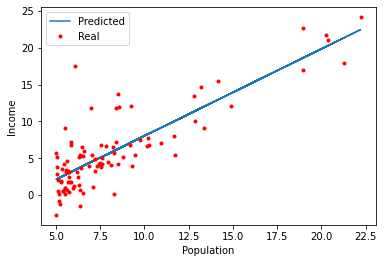

In [21]:
plt.plot(X, predY, X, y, 'r.')
plt.xlabel('Population')
plt.ylabel('Income')
plt.legend(['Predicted', 'Real'])
plt.show()

## Exercise 12
Modyfing gradient descent method to plot relationship between cost function and number of iterations

In [22]:
iterations = range(it)
costVal = np.squeeze(np.asarray(cost))

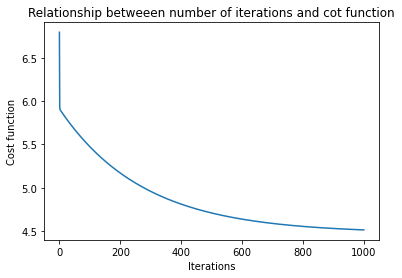

In [23]:
plt.plot(iterations, costVal)
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Relationship betweeen number of iterations and cot function')
plt.show()

# Linear regression with multiple variables

## Exercise 1
Examining input data

In [64]:
path = os.getcwd() + '/dane2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [65]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Data normalization

In [66]:
data2.Bedrooms = (data2.Bedrooms - data2.Bedrooms.mean()) / data2.Bedrooms.std()
data2.Size = (data2.Size - data2.Size.mean()) / data2.Size.std()
data2.Price = (data2.Price - data2.Price.mean()) / data2.Price.std()

In [67]:
data2.describe()

,Size,Bedrooms,Price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.746030e-16,-9.684924e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


## Exercise 2
## Exercise 3
Inserting new column to dataframe

In [68]:
data2.insert(loc=0, column='Cost', value=1, allow_duplicates=False)

In [69]:
data2.head()

,Cost,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


## Exercise 4
Separating the data

In [70]:
X = data2[['Cost', 'Size', 'Bedrooms',]]
X.head()

,Cost,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [71]:
y = data2['Price']
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: Price, dtype: float64

In [72]:
# Data conversion
X = np.matrix(X.values, dtype=np.float64)
y = np.matrix(y.values, dtype=np.float64)
theta = np.matrix(np.array([0,0,0]), dtype=np.float64)
# transpose if necessary
if len(X) != 1:
    X = np.transpose(X)
if len(y) != 1:
    y = np.transpose(y)

In [73]:
X.shape

(3, 47)

In [74]:
y.shape

(1, 47)

## Exercise 5

## Exercise 6
Calculating cost function for initial parameters

In [75]:
computeCost(X, y, theta)

0.4893617021276595

## Exercise 9
Calculating optimal parameters for dataset

In [76]:
#initial values for learning rate and no. of iterations
alpha = 0.01
it = 1000

cost = gradient_prosty(X, y, theta, alpha, it)[0]
theta_result = gradient_prosty(X, y, theta, alpha, it)[1]

## Exercise 9
Printing optimal parametres for dataset

In [77]:
theta_result

matrix([[-9.68905807e-17,  8.84684523e-01, -5.30975308e-02]])

## Exercise 10
Printing cost function for optimal theta parameters

In [78]:
cost[:][0].item()

0.4805685514694705

## Exercise 11
Plotting the regression function and dataset

In [79]:
# For plotting purposes only
X1 = np.squeeze(np.asarray(X[1]))
X2 = np.squeeze(np.asarray(X[2]))
X1,X2 = np.meshgrid(X1, X2)
y = np.squeeze(np.asarray(y))

In [80]:
# calculating predicted values
predY = theta_result[0,0] + theta_result[0,1] * X1 + theta_result[0,2] * X2 
predY = np.squeeze(np.asarray(predY))

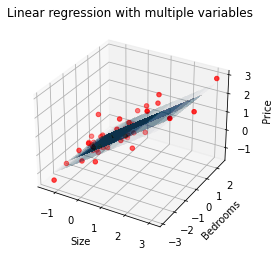

In [81]:
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(projection='3d')

# plot the surface
ax.plot_surface(X1, X2, predY, alpha=0.008)

ax.scatter(data2.Size, data2.Bedrooms, data2.Price, c='r')
plt.title("Linear regression with multiple variables")
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
 
# show plot
plt.show()
